# Analyse professional degree student enrolment v/s university count
***Research question:*** To evaluate the trend in higher education over the years based on gender, state, and degree program. Further identify which state requires additional university in the Indian State
Source: [data.gov.in](https://data.gov.in/) 

## Import libraries

In [1]:
# load excel file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn import preprocessing
# %matplotlib notebook
% matplotlib inline


## Read the excel file

In [2]:
df1=pd.read_excel("Enrolment by Level.xlsx")

## Data Cleaning

In [3]:
df1=df1.fillna(method='ffill', axis=1)
df1.columns=df1.loc[0]

df2=df1.drop([0,2],axis=0)
df3=df2.T
df3.insert(loc=229, column='B', value=0)
df3.insert(loc=229, column='C', value=0)
df3.iloc[0,df3.columns.get_loc("C")]='2011-12'
df3.iloc[0,df3.columns.get_loc("B")]='2010-11'

df_p=df3.drop(df3.columns[7::7],axis=1) #.append(df3.columns[229::7])
df_p.columns=df_p.iloc[0]
df_p=df_p.iloc[:-3]
df_p=df_p.drop('State')


## Create Multi Index Dataframe for analysis

In [4]:
states=pd.concat([df2.iloc[7:228:7,0],df2.iloc[229::7,0]]).reset_index().drop('index',axis=1)
multS=[i[0] for i in states.values]
idx=pd.MultiIndex.from_product([multS,
                            df2.columns.unique().values[1:-1:],['Male','Female','Both']],
                            names=['state', 'degree','gender'])
col = ['2015-16', '2015-14', '2014-13', '2013-12','2012-11','2011-10']
df_c = pd.DataFrame(0, idx, col)

for i in range(6):
    df_c.iloc[:,i]=df_p.iloc[:, 7+i::6].values.flatten(order='F')

df_plot=df_c.copy()
df_plot=df_plot.astype(float)
df_plot.drop('Both', level=2, axis=0,inplace=True)
df_plot.head()

2015-16  2015-14  2014-13  \
state                     degree        gender                              
Andaman & Nicobar Islands Ph.D.         Male       69.0     70.0     75.0   
                                        Female     17.0     16.0     20.0   
                          M.Phil.       Male        0.0      0.0      0.0   
                                        Female      0.0      0.0      0.0   
                          Post Graduate Male      574.0    647.0    839.0   

                                                2013-12  2012-11  2011-10  
state                     degree        gender                             
Andaman & Nicobar Islands Ph.D.         Male       38.0     15.0     15.0  
                                        Female      8.0      1.0      1.0  
                          M.Phil.       Male        0.0      0.0      0.0  
                                        Female      0.0      0.0      0.0  
                          Post Graduate Male      607.0    214.0    397.0

## Plot for total students enrolled by level of programme

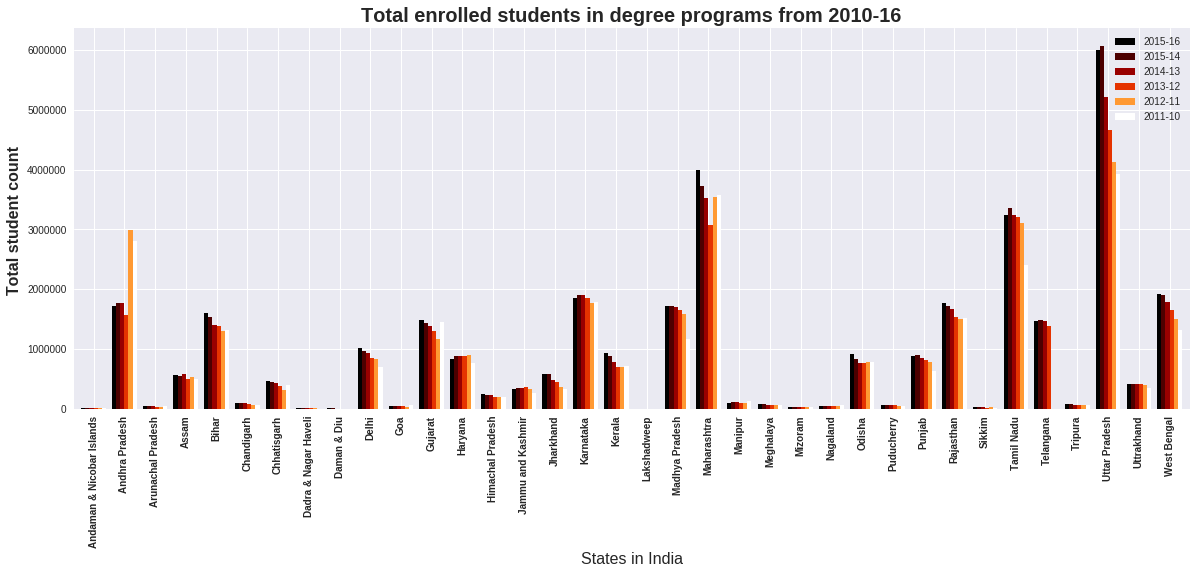

In [5]:
mpl.rcParams['font.sans-serif'] = ['Source Han Sans TW', 'sans-serif']
fi, ax1=plt.subplots(figsize=(15,10))
# plt.style.use(u'seaborn-notebook')
sns.set_style("darkgrid")
sns.despine()
_=df_plot.groupby(level=0).sum().plot(kind="bar", figsize=(20,7), width=0.8, colormap='gist_heat', ax=ax1)
ax1.set_xlabel("States in India", fontdict={
        'fontsize' : 16,
    'verticalalignment'   : 'top',
    'horizontalalignment' : 'center'
    
})
labels = [item.get_text() for item in ax1.get_xticklabels()]
ax1.set_xticklabels(labels, fontdict={
    'fontsize':10,
    'fontweight':'normal','fontweight':'bold'
    # 'rotation':50
    }) 
    
    # {'fontsize': 'small',  
    #     'fontweight': rcParams['axes.titleweight'],  
    #     'verticalalignment': 'baseline',  
    #     'horizontalalignment': loc}  )
ax1.set_ylabel("Total student count ", labelpad=20,  fontdict={  # ,
            'fontsize' : 16,'fontweight':'bold',
    'verticalalignment'   : 'top',
    'horizontalalignment' : 'center'
})
ax1.set_title("Total enrolled students in degree programs from 2010-16", fontdict={'fontsize': 20, 'fontweight':'bold'})
# ax1.style.use('seaborn-dark-palette')

***inference***
>At first glance, it is evident that number of students enrolled in professional degree programme have increased, though states like Andhra Pradesh is exception where there is downword trend. This is because the state of Andhra was bifurcated to telangana and thus many university have been classified under Telangana.  
--- --- 
Uttar Pradesh, Maharastra and Tamil Nadu have highest enrollment 



## Plot for enrollment type and gender bias 

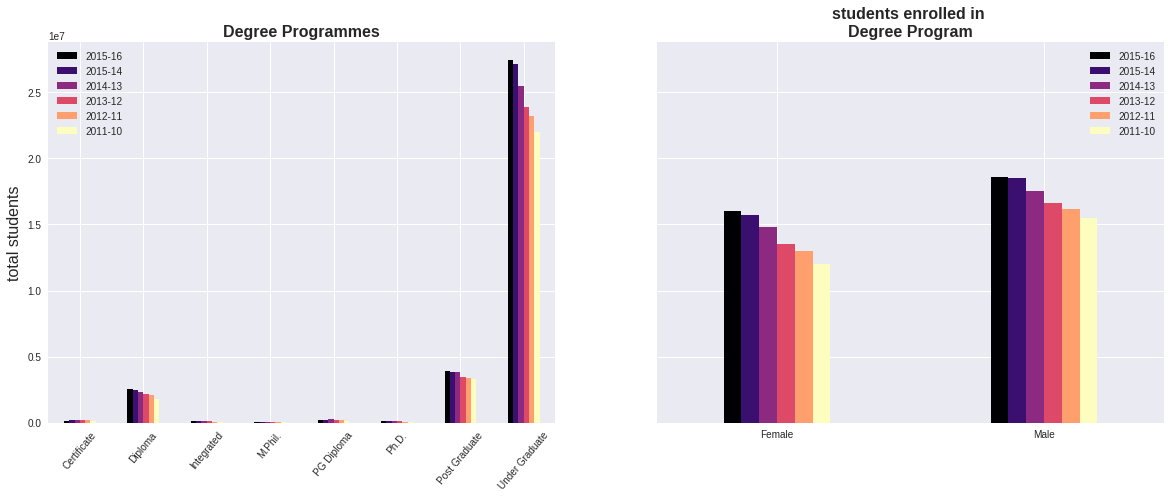

In [6]:
# fig, 
# import matplotlib.gridspec as gridspec
# plt.figure()
# gspec = gridspec.GridSpec(3, 3)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7), sharey=True) # 
# top_histogram = plt.subplot(gspec[0, 1:])
sns.set_style("darkgrid")
sns.despine()

# plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.5))
# plt.xlabel("Total Students", )
# plt.title("Students in degree program by Gender")

# sns.set(font_scale=1.2)
# plt.rc('axes', titlesize=18)
# plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=14)

df_plot.groupby(level=1).sum().plot(kind="bar", ax=axes[0], colormap='magma' , rot=50)

axes[0].set_ylabel("total students",labelpad=20, fontdict={
        'fontsize' : 16,
    'verticalalignment'   : 'top',
    'horizontalalignment' : 'center'
    
})

axes[0].set_title(label="Degree Programmes", fontdict={'fontsize': 16, 'fontweight':'bold'})
axes[0].xaxis.label.set_visible(False)




df_plot.groupby(level=2).sum().plot(kind="bar", ax=axes[1], colormap='magma', rot=0 , width=0.4)

axes[1].set_title(label="students enrolled in \nDegree Program", fontdict={'fontsize': 16, 'fontweight':'bold'})

axes[1].xaxis.label.set_visible(False)
# fig.tight_layout()

***Inference***
> At first glance, there is huge difference between students opting for higher studies. 
- The number of students for Ph.D. vastly decreases compared to under Grad and Post Grad. 
- Also, number of students opting for higher studies stays constant over the years
- Overall, female opt less for degree programme compared to male. But the trend does not seem to have changed over the years


In [7]:

# # df_plot.groupby(level=1).sum().columns

# df_plot.groupby(level=0).sum().plot(kind="bar", figsize=(20,5), width=0.8, colormap='gist_heat')
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,15), sharey=True) #
# sns.set_style("ticks")
# sns.despine()
# sns.set(font_scale=1.2)
# plt.rc('axes', titlesize=18)
# plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=14)

# df_plot.groupby(level=1).sum().plot(kind="bar", ax=axes[0], colormap='magma', title="Degree Programmes" , rot=50)
# axes[0].set_ylabel("total students")
# axes[0].set_title(label="Degree Programmes", fontweight="bold")
# df_plot.groupby(level=2).sum().plot(kind="bar", ax=axes[1], colormap='Accent', title="students enrolled in \nDegree Program" , rot=50 )
# axes[1].set_title(label="students enrolled in \nDegree Program", fontweight="bold")

# fig.tight_layout()


## comparision across degree programmes based on gender

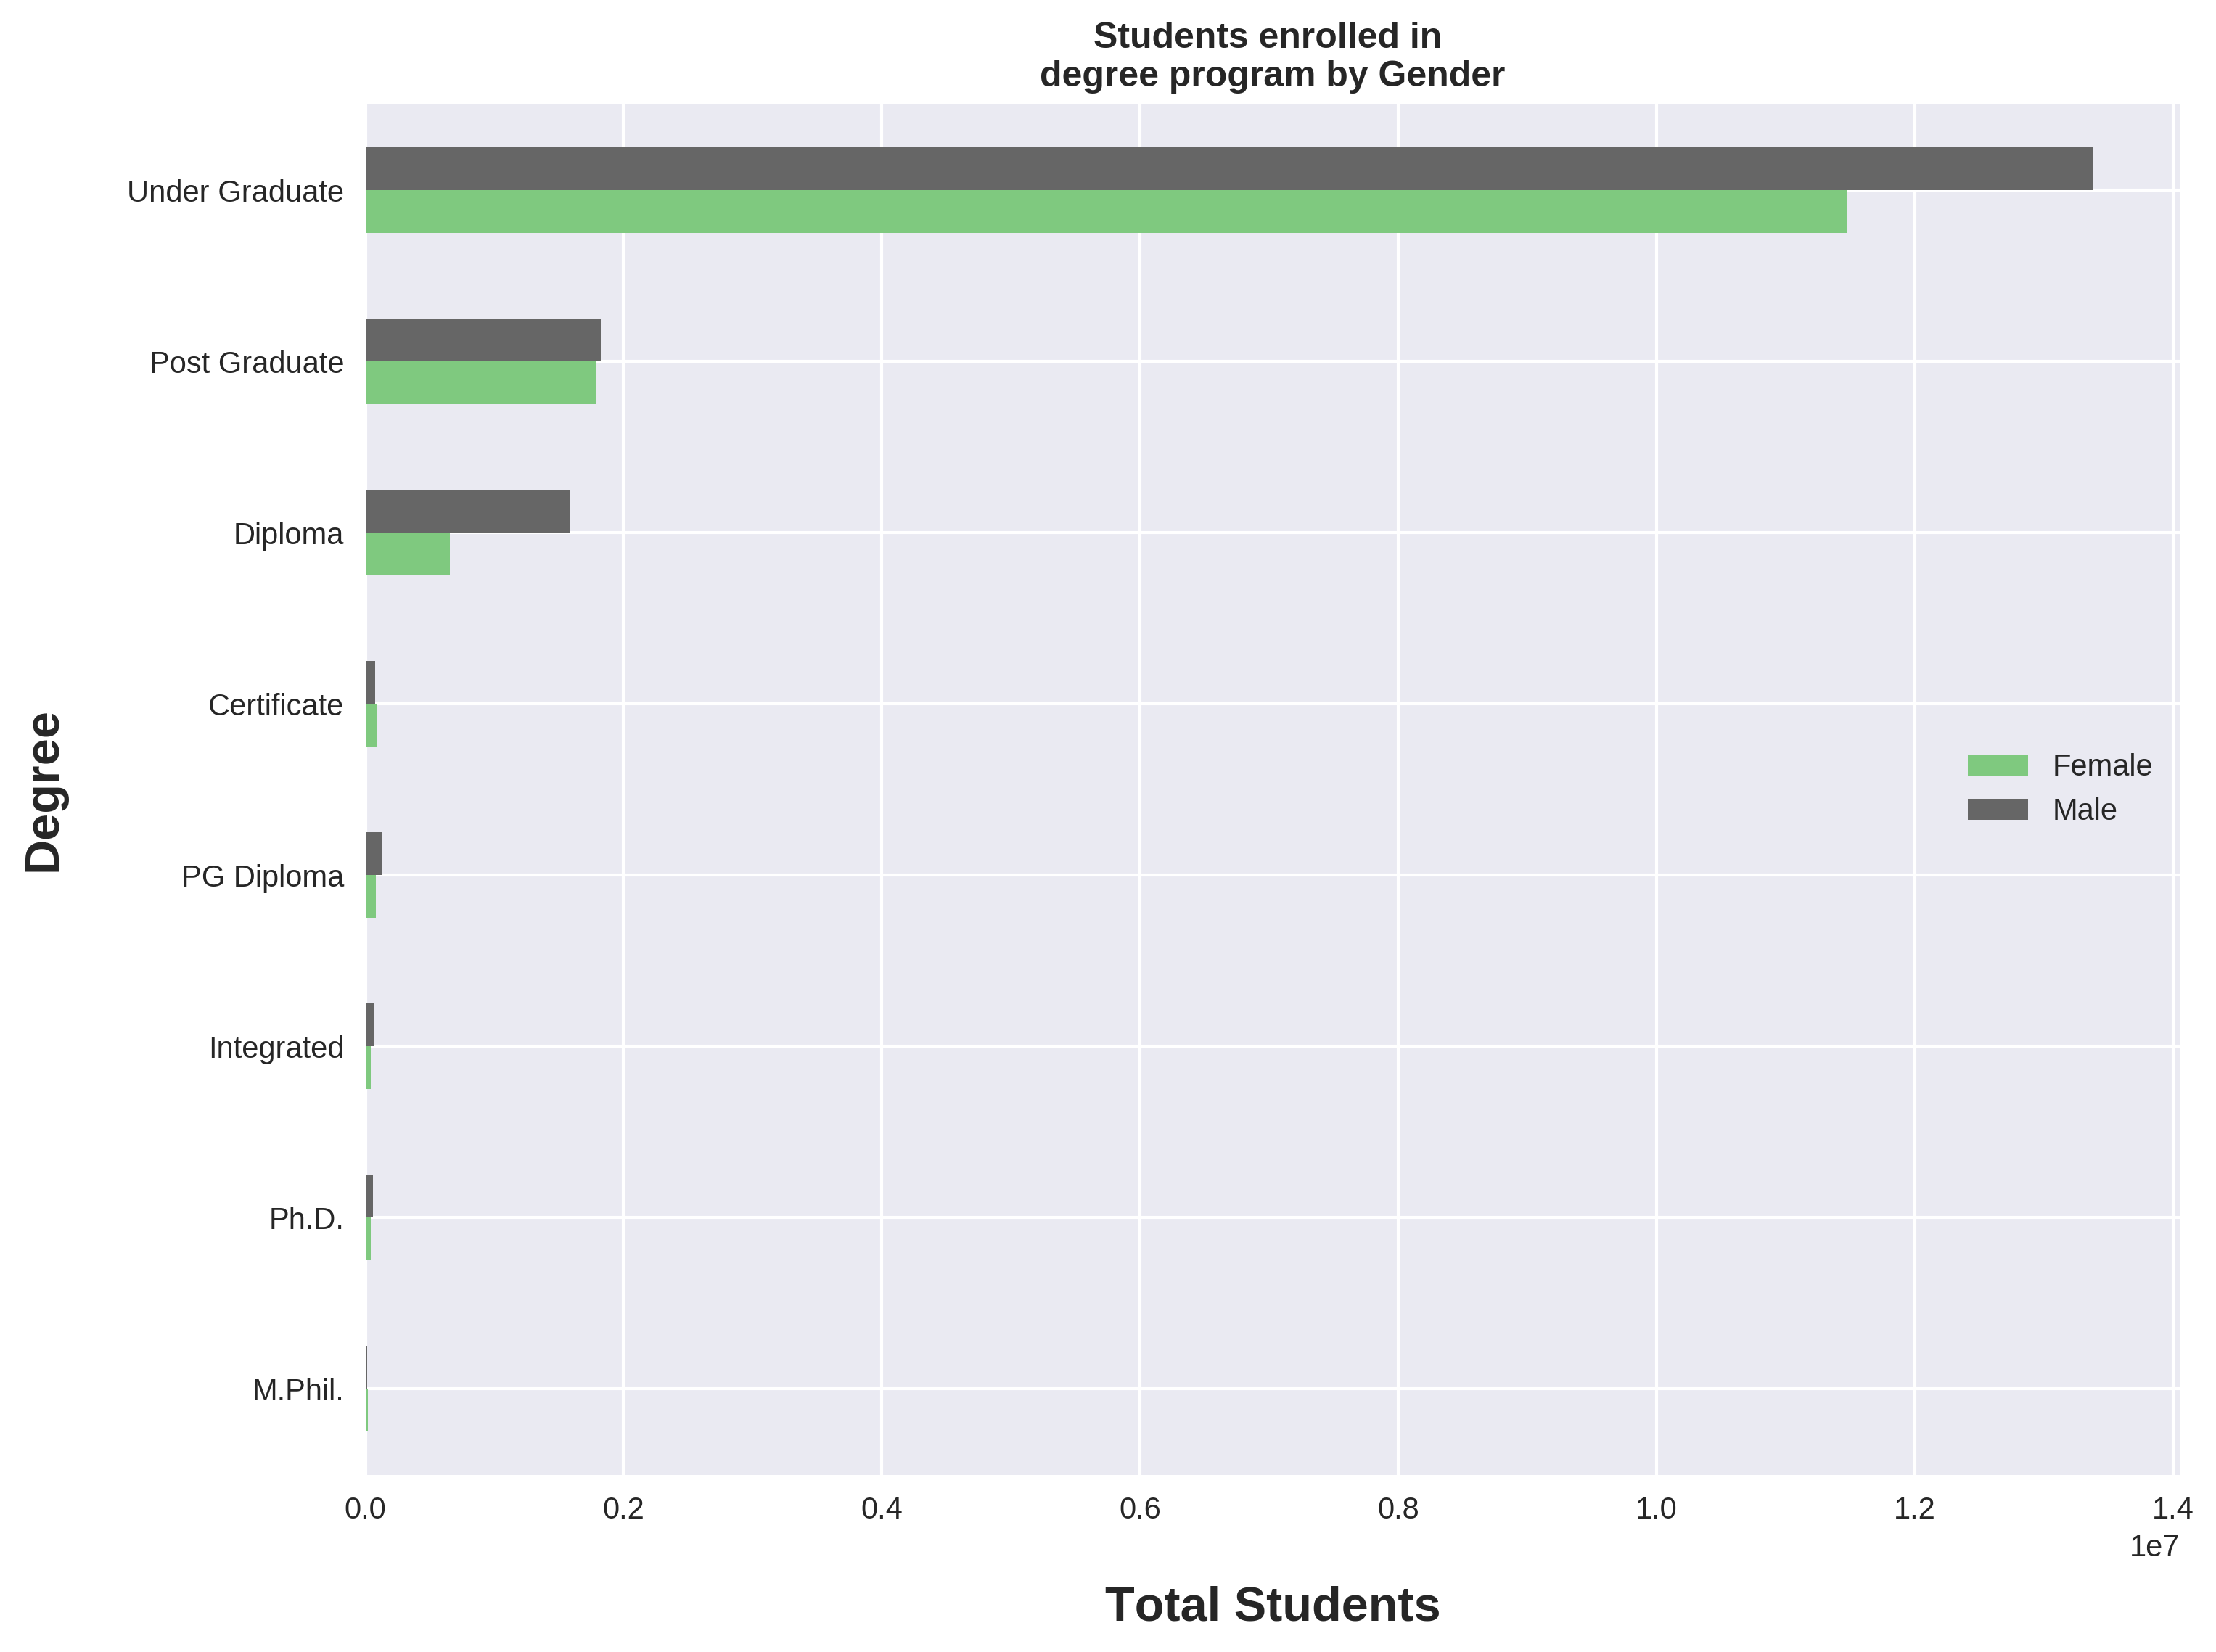

In [8]:

import seaborn as sns

# plt.figure(figsize=(15,10))

# df_plot.groupby(level=[2,1]).sum().plot(kind="bar",figsize=(15,10))
fig1, ax = plt.subplots( figsize=(15,10), dpi=300 )
sns.set_style("darkgrid")
df_plot.groupby(level=[1,2]).sum().mean(axis=1).unstack(level=1).sort_values(by=['Female'],ascending=True).plot(kind="barh",figsize=(10,7),ax=ax, colormap="Accent", sort_columns=False) 
sns.despine()
fig1.tight_layout()
plt.legend(loc='center right', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Total Students",labelpad=20, fontdict={'fontsize' : 16, 'fontweight': 'bold'} )
plt.ylabel("Degree",labelpad=20, fontdict={'fontsize' : 16, 'fontweight': 'bold'} )
ax.set_title(label="Students enrolled in \ndegree program by Gender", fontweight="bold")
# plt.title("Students in degree program by Gender")
plt.rc('axes', titlesize=18)



plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels



***Inference***
> Female enrolled less compared to male for under graduate and diploma programme. But for post graduation, Ph.D. the ratio is nearly same

In [9]:
uni=pd.read_excel('Number of Universities.xlsx')
uni.columns=uni.iloc[0]
uni.drop([0,1],axis=0, inplace=True)
uni.fillna(0, inplace=True)
uni=uni.set_index(uni['State']).drop('State', axis=1)

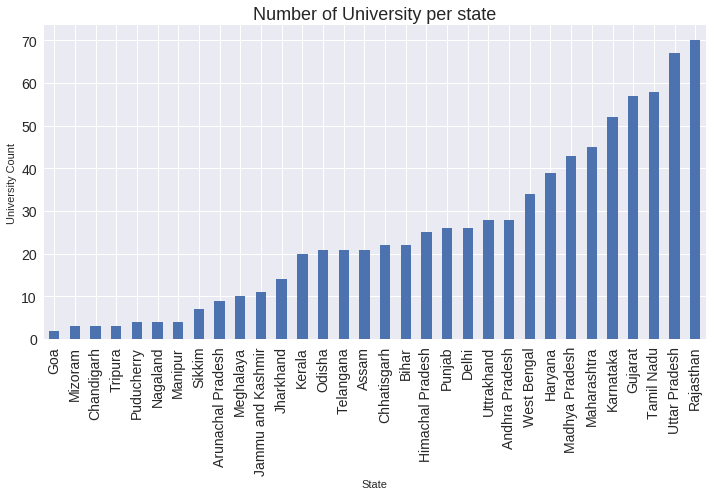

In [10]:
un, uax= plt.subplots(figsize=(10,7))
uni.loc[:,'2015-16'].sort_values().plot(kind="bar", ax=uax)
uax.set_ylabel("University Count")
uax.set_title("Number of University per state")
un.tight_layout()
stud=pd.DataFrame(df_plot.groupby(level=0)['2015-16'].sum())

ustud=pd.DataFrame(uni.loc[:,'2015-16'])
mstud=pd.merge(ustud, stud, left_index=True, right_index=True )

## Plot for Students v/s University count, 2015-16
### Click on the map to know the state

<IPython.core.display.Javascript object>


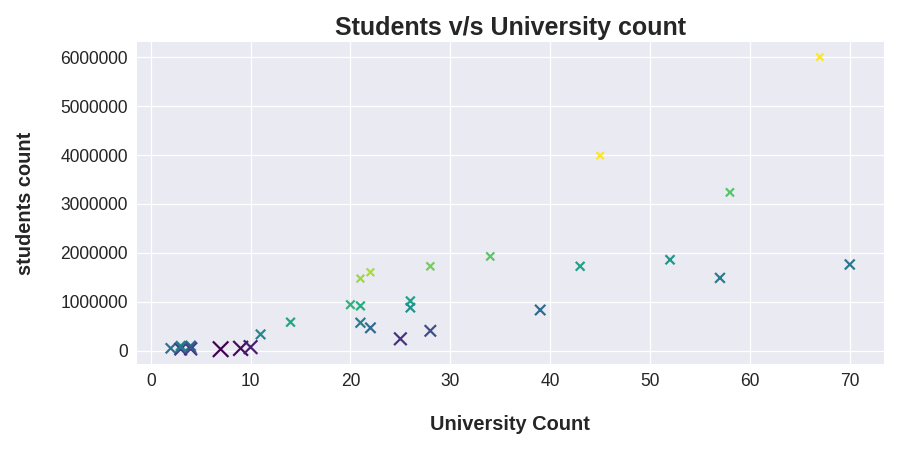

In [12]:
# import matplotlib.animation as animation
%matplotlib notebook
md=plt.figure(figsize=(10,5))
sns.set_style('darkgrid')

x=mstud['2015-16_x'].values
y=mstud['2015-16_y'].values
z=np.sqrt(y/x)
# plt.scatter(df['height'], df['weight'], picker=5)
plt.scatter(mstud['2015-16_x'].values,mstud['2015-16_y'].values, picker=5, c=z, s=9990*(1/z),cmap="viridis", edgecolor='red', marker='x')
plt.gca().set_ylabel('students count',labelpad=20, fontdict={'fontsize' : 16, 'fontweight': 'bold'} )
plt.gca().set_xlabel('University Count', labelpad=20, fontdict={'fontsize' : 16, 'fontweight': 'bold'})
plt.gca().set_title("Students v/s University count",  fontdict={'fontsize' : 20, 'fontweight': 'bold'})
md.tight_layout()
def onpick(event):
    origin = mstud.iloc[event.ind[0]].name
    plt.gca().set_title('Students v/s University count \nYou selected {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
_=plt.gcf().canvas.mpl_connect('pick_event', onpick)

***Inference***
> It is evident from the scatter plot that states which are marked yellow or light green needs more university for the students that study in their state. 